# 問題定義

## ゴール

良いレビューと悪いレビューを判別すること。

# データの取得

まずは必要なライブラリを揃えていきます。

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 1000)

import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

今回のデータセットを読み込みます。

In [2]:
df = pd.read_csv('./Womens Clothing E-Commerce Reviews.csv')
print(df.shape)
df.head()

(23486, 11)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [3]:
df.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok.",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties and we","I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this dress was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!",3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,"This dress in a lovely platinum is feminine and fits perfectly, easy to wear and comfy, too! highly recommend!",5,1,22,General Petite,Dresses,Dresses


このデータセットには、23486行と10個のフィーチャ変数が含まれています。各行は顧客レビューに対応し、変数を含みます。

- Clothing ID： Integerレビュー対象の特定の作品を参照するカテゴリ変数。
- Age: 評価者の正の整数変数。
- Title：レビューのタイトルの文字列変数。
- Review Text：レビュー本文の文字列変数。
- Rating：お客様が1ワーストから5ベストまで付与した製品スコアのポジティブ序数整数変数。
- Recommended IND： 1が推奨される製品を推奨するバイナリ変数、0は推奨されません。
- Positive Feedback Count：正の整数で、このレビューが陽性であった他の顧客の数を記録します。
- Division Name：製品の上位部門のカテゴリ名。
- Department Name：製品部門名のカテゴリ名。
- Class Name：製品クラス名のカテゴリ名。

In [4]:
df.sample(30)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
3520,3520,872,62,Loved so much i bought both!,"Immediately loved this when i saw it online and even more in person. i'm only 5'1' so i tried the petite sizing first but ended up buying the regular in an xs for the slightly longer length. the regular fit me like the model in length and i probably could have taken the xxs except the sleeves were too narrow in that size. i like that the cuffs are long so if you have to turn it up (like i do) it doesn't look weird. also, i found the fit flattering at the hips, following my hourglass shape withou",5,1,11,General,Tops,Knits
20632,20632,168,35,I wanted to fit to work!,"I tried this top on today because i was really hoping i could get the shorts and robe set. the shirt was softer than i was expecting, but when i tried it on it was an uncomfortable fit. there was some tightness in the armpit area, which is not where i would have expected it to be tight. the rest of it was comfortable and reasonable looseness so i don't think a size up would have been a good option for me. i like the design a lot so i was really disappointed it didn't fit. it is between a lightwe",4,0,2,Initmates,Intimate,Sleep
14028,14028,621,46,Drop-dead gorgeous,"When i tried on this dress my husband's jaw dropped to the ground. it is so unique and so beautiful on. however the cut of the fabric fit oddly on me so i am exchanging for a small with fingers crossed. i am a size 6, 5'8"" and the medium just felt a little boxy over the middle section. my six year old son said that it was the most beautiful dress he had ever seen. buy this!",5,1,10,General Petite,Intimate,Lounge
5756,5756,880,67,Flowers and butterflies!!,"This is why i shop at retailer. i was in one of my local stores recently, mainly to check out the sale. my boyfriend was with me. we hadn't been in the store 5 minutes when we passed a table with piles of folded tees. this one caught my eye. the color, omg! and then flowers and butterflies! try it on, he said, as i held one up. no..... i shouldn't. we wandered around, checked out the sale and all the new. and i was back at that table looking at that tee. so, i took a small and an xs to the fitting",4,1,7,General,Tops,Knits
7173,7173,1092,47,Incredible small bust,I love this dress. the design is gorgeous. however the bust is extremely small. only someone in the a or b range will fit into their appropriate size. i am disappointed.,3,0,5,General,Dresses,Dresses
18635,18635,835,53,Swanky fun!,This elegant tank made me feel as if i had been transported to downton abbey. the velvet trim and the lovely embellishments of sparkle have an art deco delight. the swing of the fabric was playful and flattering. it's easy to dress up and dress down. fantastic top!,5,1,0,General,Tops,Blouses
20701,20701,921,54,Cute but chunky,"While i love the design, this sweater even in the small is too over-sized for me and was unflattering. it was returned.",3,0,0,General,Tops,Sweaters
20413,20413,858,83,Classic,"Love this top.\r\nthe fit is perfection!\r\nthe fabric is wonderfully soft.\r\ni ordered the green, love this color.\r\nwill be ordering it in the grey also..\r\nfits very true to size.",5,1,3,General Petite,Tops,Knits
16881,16881,528,40,Very cute!,"I have been looking at rompers for a while but being that i'm 40, a lot of stores seem to carry rompers that are super short. i think these are the perfect length for summer (and for me!). it's cute! i am 5'5"" and 110 pounds and i ordered the xs. i docked one start because the top part seems to have a bit of excess fabric. if i pull the waist up, the top 1/2 balloons out a little awkwardly. but if i pull the shorts down so that the drawstring is resting lower than my natural waist, it looks okay",4,1,2,General,Bottoms,Shorts
2798,2798,1009,38,Beautiful skirt but so noisy,This is a beautiful skirt. it is exactly as pictured. the colors are bright an

# EDA

## データを見てみる

### データ型を見てみる

まずはデータセットのデータ型を確認します。

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


int型のcolumnが6つ、object型のcolumnが5つのデータセットであることがわかりました。  
int型のデータには欠損がないようですが、object型のデータにはいくつか欠損が見られます。  
具体的にいくつの欠損値があるか確認します。

### 欠損値を見てみる

In [6]:
df.isnull().sum().sort_values(ascending=False)

Title                      3810
Review Text                 845
Class Name                   14
Department Name              14
Division Name                14
Positive Feedback Count       0
Recommended IND               0
Rating                        0
Age                           0
Clothing ID                   0
Unnamed: 0                    0
dtype: int64

欠損値を可視化して確認します。

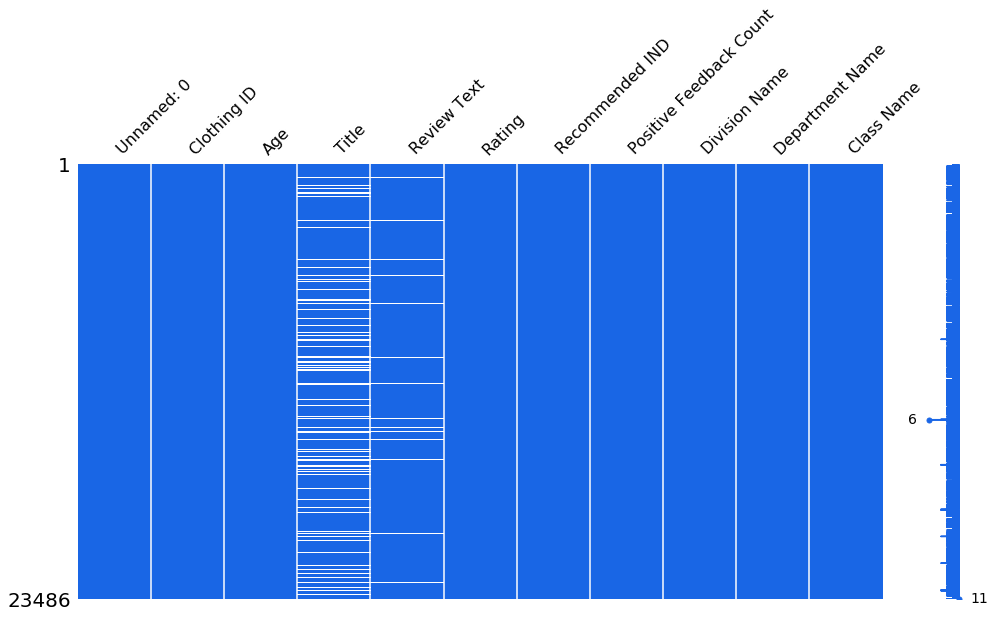

In [7]:
msno.matrix(df=df, figsize=(16, 8), color=(0.1, 0.4, 0.9))

Titleに多くの欠損値があることがわかりました。また、Review Textにも1000近くの欠損値が確認できます。  
customerのレビューが1000近く欠損しているということです。  
その他は小さな数ですが、製品部門や製品名が欠損しています。

### 統計量を見てみる

In [8]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


Ageの平均が43なので、年齢層はやや高めだと思われます。  
また、Ratingの平均が4.1なので、製品に満足している傾向にあると思われます。

## データを可視化してみる

### 分布を見てみる

#### Age

customerの年齢はどのような分布になっているのか確認してみたいと思います。

In [9]:
np.unique(df.Age.unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 89, 90, 91, 92, 93, 94, 99])

In [10]:
df.Age.value_counts()

39    1269
35     909
36     842
34     804
38     780
37     766
41     741
33     725
46     713
42     651
32     631
48     626
44     617
40     617
43     579
31     569
47     564
53     560
45     529
29     513
49     490
56     471
52     442
28     428
26     423
30     407
50     398
54     395
51     393
57     363
      ... 
69     113
20     108
21     102
70      93
71      51
74      50
72      46
83      43
73      40
19      40
75      26
77      18
79      15
78      15
82      13
76      10
80      10
85       6
84       6
89       5
91       5
81       5
18       4
87       4
94       3
93       2
90       2
86       2
99       2
92       1
Name: Age, Length: 77, dtype: int64

なんと99歳の方がいらっしゃいました！  
18~99歳の方々に広く利用されているようです。  
ではこの年齢の分布を棒グラフにしてみたいと思います。

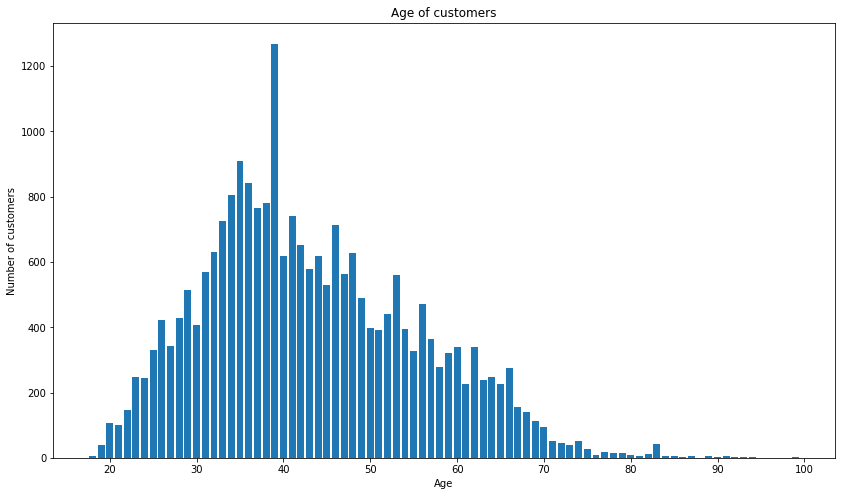

In [11]:
x = np.unique(df.Age)
y = df.Age.value_counts().sort_index()

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.title('Age of customers')
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.show()

だいたい35歳を中心とした正規分布のような形になりました。  
一番多い年齢は39歳で、一番少ないのは92歳です。  
このeコマースを活発に利用しているのは30代の方々であることがわかりました。

#### Rating

次はレビューの点数の分布を見ていきたいと思います。

In [12]:
df.Rating.value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

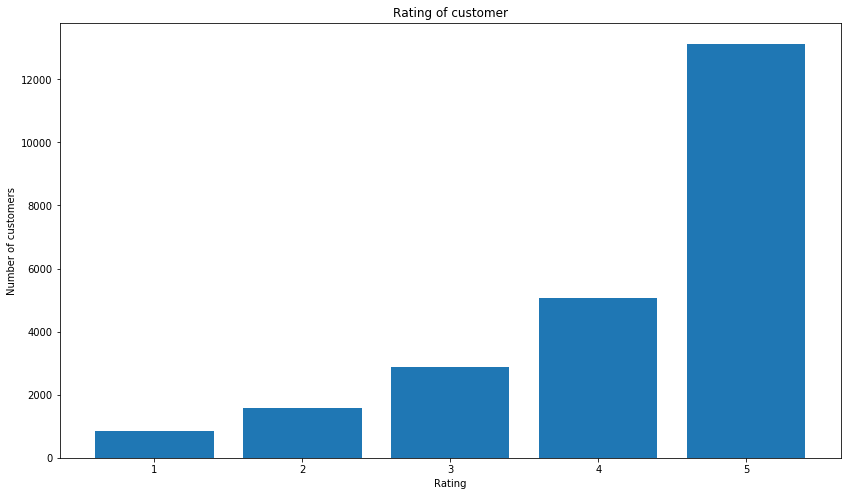

In [13]:
x = np.unique(df.Rating)
y = df.Rating.value_counts().sort_index()

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.title('Rating of customer')
plt.xlabel('Rating')
plt.ylabel('Number of customers')
plt.show()

Ratingで5をつけているcustomerが非常に多いことがわかりました。全体的に見てcustomerは満足している傾向にあると思われます。  

#### Recommended IND

次にRecommended INDの分布を見てみたいと思います。  
Recommended INDは購入した製品を他のcustomerに勧めたいかどうかを1と0で表現したものです。

In [14]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

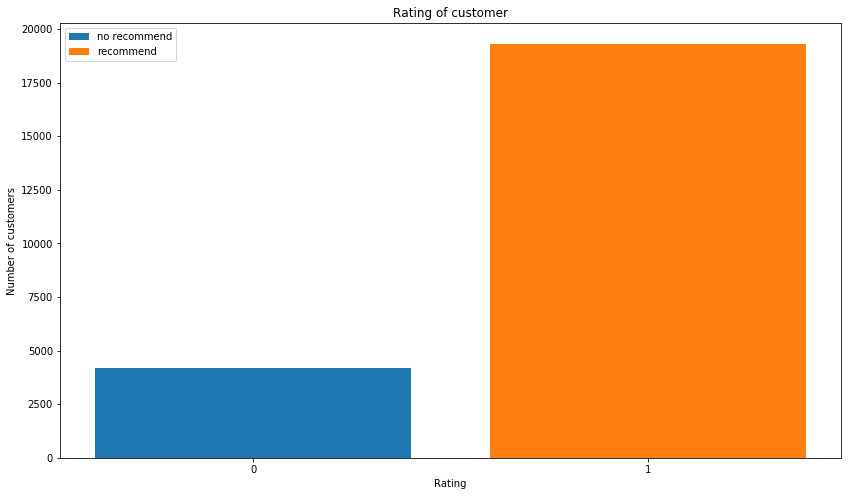

In [15]:
x = np.array(['0', '1'])
y = df['Recommended IND'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
plt.bar(x[0], y[0], label='no recommend')
plt.bar(x[1], y[1], label='recommend')
plt.title('Rating of customer')
plt.xlabel('Rating')
plt.ylabel('Number of customers')
plt.legend()
plt.show()

　きれいに描写する方法がありました。

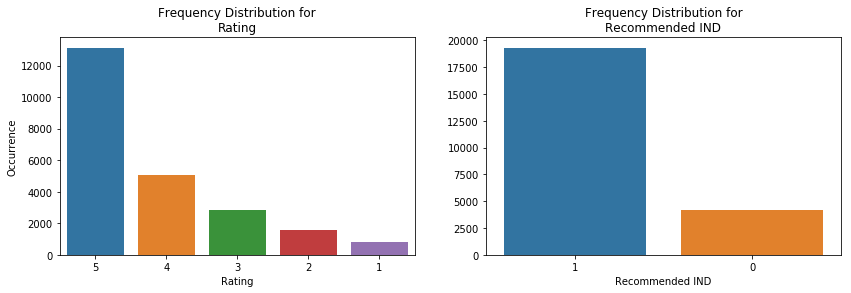

In [16]:
#cat_dtypes = [x for x,y,z in unique_count if y < 10 and x not in ["Division Name","Department Name"]]
cat_dtypes = ["Rating","Recommended IND"]
increment = 0
f, axes = plt.subplots(1,len(cat_dtypes), figsize=(14,4), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=df,order=df[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title("Frequency Distribution for\n{}".format(cat_dtypes[increment]))
    axes[i].set_ylabel("Occurrence")
    axes[i].set_xlabel("{}".format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel("")
plt.show()

1が勧めたいということなので、他のcustomerに勧めたい人が多いということがわかりました。  
やはり、customerは製品に満足している傾向があると思われます。

#### Positive Feedback Count

次はPositive Feedback Countの分布を見てみたいと思います。

In [17]:
print(len(np.unique(df['Positive Feedback Count'])))
np.unique(df['Positive Feedback Count'])

82


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  61,  64,  65,  66,  68,
        69,  71,  77,  78,  81,  82,  84,  87,  89,  93,  94,  95,  98,
        99, 108, 117, 122])

In [18]:
df['Positive Feedback Count'].value_counts()

0      11176
1       4043
2       2193
3       1433
4        922
5        673
6        525
7        374
8        319
9        261
10       225
11       178
12       146
14       121
13       102
15        94
17        81
16        74
18        62
19        54
20        40
23        31
21        30
22        29
25        25
28        24
26        23
24        21
27        20
30        18
       ...  
49         2
46         2
55         2
58         2
66         1
50         1
64         1
94         1
48         1
98         1
78         1
82         1
59         1
93         1
69         1
87         1
71         1
54         1
89         1
108        1
117        1
122        1
77         1
84         1
68         1
52         1
56         1
61         1
99         1
95         1
Name: Positive Feedback Count, Length: 82, dtype: int64

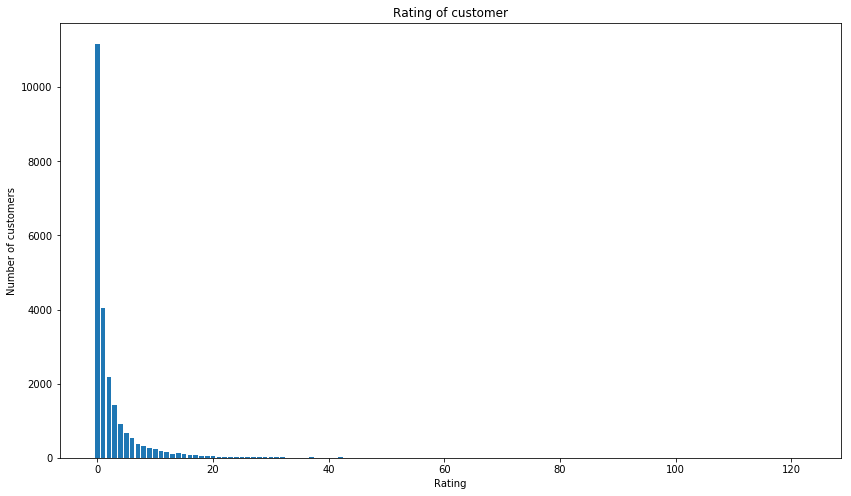

In [19]:
x = np.unique(df['Positive Feedback Count'])
y = df['Positive Feedback Count'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.title('Rating of customer')
plt.xlabel('Rating')
plt.ylabel('Number of customers')
plt.show()

他のレビューに反応している人は少ないようです。このカウントが多いレビューの内容を見てみる必要がありそうです。

In [20]:
df[df['Positive Feedback Count'] > 70]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
688,688,1087,52,Worth it,"I never buy anything at retailer full price, but had to get this when i tried it at my local store, especially since it's back ordered for so long. it's very flattering, and super comfortable. fully lined, not see- through at all. elastic waist that's hidden under the sweater top. will be so easy to throw on and dress up for an evening out, or lounge in after a day at the pool or beach. looking at the model pics, i was concerned the arm pit holes came too low, but on me that is not the case. the t",5,1,84,General,Dresses,Dresses
1167,1167,1060,41,NaN,"This would be perfect if only it were lined!!!! i have a high waist and hourglass shape so jumpers are very hard to find that fit my body type. this is a perfect fit for my body shape and when on, it looks like a lovely dress. however, it is not lined and the material is very light and ivory so you see everything. you can't wear a slip so that leaves the option of some sort of bodysuit if you don't want to show the world what you have. i am very tired of all of the light colored clothing not bei",3,0,71,General Petite,Bottoms,Pants
1294,1294,1095,29,NaN,"I've been on the hunt for the perfect dress to wear for my daughter's first birthday party. since we are throwing a traditional korean first birthday, i was looking for a dress you might wear to a daytime wedding or a fancy brunch. i just purchased this dress today in the store and it fits my needs perfectly. \r\n\r\ni disagree with the first reviewer who mentioned that this dress was too sheer. this dress is a thicker fabric so i do not think i will need a slip when wearing it. it does drape nicely",5,1,117,General,Dresses,Dresses
2123,2123,1072,39,Another tiny success,"Tiny are experts at making busy bohemian shirtdresses that look casual but retain a feminine drape. it skims over my trouble spots without adding bulk. this is my fourth dress from this label and it does not disappoint. for my frame and style i chose tts but those of slender & petite builds may want to size down. for reference i am 5'3"" 140# 36dd.",5,1,94,General Petite,Dresses,Dresses
2382,2382,1110,56,Pretty fabric but needs serious pressing,"This dress arrived today in such a crumpled and wrinkled state that i was reluctant to even try it on. it is on the large size, but fine if you are looking for a very flowing look. longer at the front than shown in the photograph and i am 5'9"". i am sending it back. it is a pretty fabric, although shinier than expected. i am just not prepared to spend so much time pressing and steam ironing this item every time i want to wear it.",3,0,77,General,Dresses,Dresses
3787,3787,1091,63,Large and thin,"I bought this for an upcoming conference and was grateful that it shipped very promptly.\n\nit runs quite large, in my opinion. i'm 5'7"" and about 130-135lbs. the small was huge on me in the chest and shoulders/arms. the stomach also wasn't very fitted. the material is thinner than i expected (you can see through the dress to some extent when you hold it up to the light), but i don't think this is a problem, necessarily. had it been thicker, it probably would be too warm. but you might need a slip",3,0,82,General,Dresses,Dresses
4410,4410,1081,63,Cute and flattering!,"Ordered this in the orange (black, white and turquoise) print in both a small and medium. the style is cute and i like the high neckline that shows off the shoulders and swing skirt that falls beautifully and hides a multitude of figure problems. :) i also previously bought the emerson swing dress, which is the same style by maeve. the emerson style ran a bit larger and as the reviews there state, the armholes were a bit long - so i ended up with a small in that one. this lilt swing dress, howev",5,1,81,General Petite,Dresses,Dresses
4710,4710,836,34,Like wearing a beautiful painting,"The retailer by me actua

##### 共感が多いレビュー

In [21]:
df[df['Positive Feedback Count'] == 95]['Review Text']

16329    I loved the idea of the placement print around the neckline and shoulders and even the nape. the print transforms an otherwise basic t-shirt into an eye catching top. it lacked in the length department, and there was extra fabric under the sleeves that wasn't flattering just above the girls.\r\n\r\nthis is made by retailer brand postmark. i own several tops by this brand, and found that their printed fabric tends to fade out from wash #1. as is usual for postmark, the brand was not stated on the produ
Name: Review Text, dtype: object

私はネックラインと肩の周りに配置プリントのアイデアが大好きで、首輪も。 プリントはそうでなければ基本的なTシャツを目につくトップに変換する。 それは長さ部門に欠けていた、そして、女の子のすぐ上にお世辞ではなかった袖の下に余分な生地があった。これは小売店ブランドの消印によって行われます。 私はこのブランドでいくつかのトップスを所有しており、プリントされた布地は洗濯＃1から退色する傾向があることがわかりました。 通常は消印のとおり、ブランドはプロダクトには記載されていません

In [22]:
df[df['Positive Feedback Count'] == 122]['Review Text']

7218    I loved the lace detailing all over this dress and the fact it had pockets and was mostly cotton. it just looked so inviting, so i grabbed two sizes to try on (10 & 12) that 99% of the time fit me with retailer clothes. here are my thoughts:\n__________\npros:\n- lace detailing is lovely all over.\n- everything runs tts except at the bust (see below).\n- breathable fabric, comfortable.\n_________\ncons:\n- i'm a 36c and could not button the top two buttons of this dress in a size 10 (i'm 5'9, hourglass, a
Name: Review Text, dtype: object

私はこのドレスのいたるところで細部を描いたレースを愛していました。ポケットがあって、ほとんどがコットンでした。 それはちょうどそう招待していたので、私は時間の99％が小売店の服に私に合っている（10＆12）を試してみるために2つのサイズをつかんだ。 ここに私の考えがあります：\ n __________ \ npros：\ n-レースディテールは素敵です。\ nすべてがバスト（下記参照）を除いてttsを走ります。\ n通気性のある生地、快適です。\ n _________ \ ncons：\ n - 私は36cなので、サイズ10でこのドレスのトップの2つのボタンを押すことができませんでした（私は5'9、砂時計、

In [23]:
df[df['Positive Feedback Count'] == 108]['Review Text']

7765    I generally don't write bad reviews, but there is a real discrepancy between the quality of this kimono and the cost. the design and colors are great, but the fabric is ripping on all the kimonos on the rack in my store where the manufacturer's tag is at the back of the neck. the material is very thin, so there are other small holes beginning throughout the garment. i shop at retailer all the time, and this is not a $98 item of clothing.
Name: Review Text, dtype: object

私は一般的に悪いレビューを書いていませんが、この着物の品質とコストとの間には本当の不一致があります。 デザインと色はすばらしいですが、メーカーのタグが首の後ろにある私の店のラックにあるすべての着物を布がリッピングしています。 材料は非常に薄いので、衣類全体に始まる小さな穴があります。 私はいつも小売店で買い物をしていますが、これは98ドルの衣服ではありません。

##### 共感が少ないレビュー

In [24]:
df[df['Positive Feedback Count'] == 1]['Review Text'][6]

'I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.'

私はそれを人のように見えるかどうかを見るために、私のバスケットにこれを最後のミントで書いた。 （店舗のピックアップ）。 私はとても暗いので、私はダークラーの色と一緒に行った:-) hte色は本当に豪華で、それは完全にそれを試していたeverythiing mathcedそれが判明。 それは私の上に少しばかげていて、hte xsはhte msalletのサイズです（バマー、小柄ではありません）。 私は言ったように、それはすべてをmatvehdするので、私はそれをジープすることを決めた。 私のejans、ズボン、そして3つのスカートを試してみました。

In [25]:
df[df['Positive Feedback Count'] == 1]['Review Text'][14]

'This is a nice choice for holiday gatherings. i like that the length grazes the knee so it is conservative enough for office related gatherings. the size small fit me well - i am usually a size 2/4 with a small bust. in my opinion it runs small and those with larger busts will definitely have to size up (but then perhaps the waist will be too big). the problem with this dress is the quality. the fabrics are terrible. the delicate netting type fabric on the top layer of skirt got stuck in the zip'

これは、休暇の集まりに最適です。 私は長さが膝をグレーズするので、オフィス関連の集まりには十分に保守的です。 サイズが小さい私はよくフィット - 私は通常、小さなバストとサイズ2/4です。 私の意見では、それは小さく走り、より大きなバストを持つ人は間違いなくサイズアップする必要があります（しかし、おそらくウエストは大きすぎます）。 このドレスの問題は品質です。 生地はひどいです。 スカートの最上層の繊細なネットタイプのファブリックがジッパーについてしまった

In [26]:
df[df['Positive Feedback Count'] == 1]['Review Text'][37]

'Just ordered this in a small for me (5\'6", 135, size 4) and medium for my mom (5\'3", 130, size 8) and it is gorgeous - beautifully draped, all the weight/warmth i\'ll need for houston fall and winter, looks polished snapped or unsnapped. age-appropriate for both my mom (60\'s) and myself (30\'s). will look amazing with skinny jeans or leggings. we ordered the gray which is true to the photos.'

ちょうど私のための小さい（5 \ '6 "、135、サイズ4）と私のお母さん（5 \' 3"、130、サイズ8）のためのメディアでこれを注文し、それは豪華です - 美しいドレープ、すべての重量/暖かさ 私はヒューストンの秋と冬のために必要があります、磨かれたスナップまたはスナップされて見える。 私のお母さん（60 \ 's）と私（30 \' s）の両方に適した年齢です。 スキニージーンズやレギンスで驚くほどに見えます。 私たちは写真に忠実なグレーを注文しました。

##### 特徴

共感が多いレビューに共通しているのは内容が具体的であるという特徴が見てとれました。  
例えば、「ネックラインと肩の周りに配置プリントのアイデアが大好きで...」というように服のどの部分のどんなデザインが好きか、  
というような具体的に書かれているレビューは多くの共感を得る傾向にありそうです。  
また、製品に対する批判的なレビューもその指摘が的確であれば多くの共感を得る傾向にあるように思えます。

かたや共感が少ないレビューは、その人しか持っていないような悩みを訴えていたり、単なる感想であるような傾向がありました。  
共感を得るレビューは多くの人が悩んでいることについて書かれていることが必須でありそうです。

#### Clothing ID

次に同じClothing ID、つまり同じ製品がが何回レビューを書いているか見てみたいと思います。

In [27]:
print(len(np.unique(df['Clothing ID'])))
np.unique(df['Clothing ID'])

1206


array([   0,    1,    2, ..., 1203, 1204, 1205])

In [28]:
df['Clothing ID'].value_counts().sort_index()

0        1
1        3
2        1
3        1
4        1
5        1
6        1
7        1
8        7
9        1
10       1
11       1
12       1
13       1
14       1
15       2
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       8
25       1
26       1
27       1
28       1
29       1
        ..
1176     1
1177     2
1178     1
1179     1
1180     2
1181     3
1182     1
1183     1
1184     2
1185     2
1186     1
1187     2
1188     1
1189     3
1190     3
1191     1
1192     4
1193     5
1194     1
1195     2
1196     1
1197     3
1198     2
1199     1
1200     1
1201     2
1202     9
1203    11
1204     2
1205     2
Name: Clothing ID, Length: 1206, dtype: int64

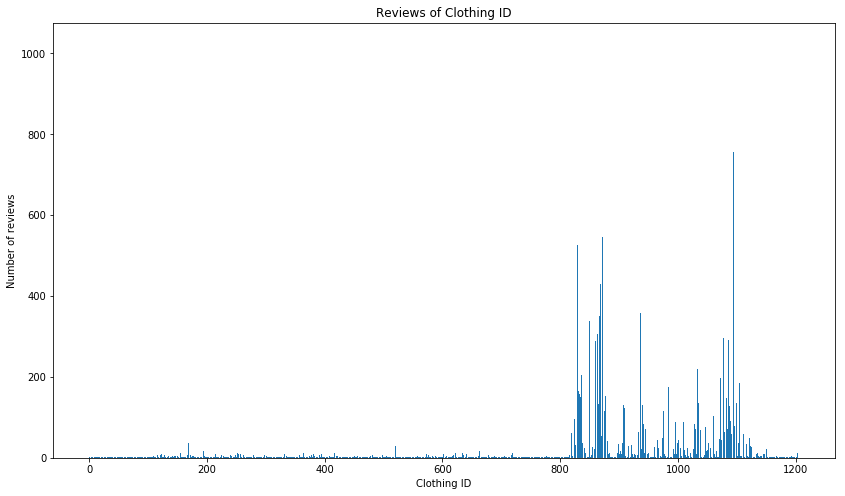

In [29]:
x = np.unique(df['Clothing ID'])
y = df['Clothing ID'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.title('Reviews of Clothing ID')
plt.xlabel('Clothing ID')
plt.ylabel('Number of reviews')
plt.show()

きれいに描写する方法がありました。

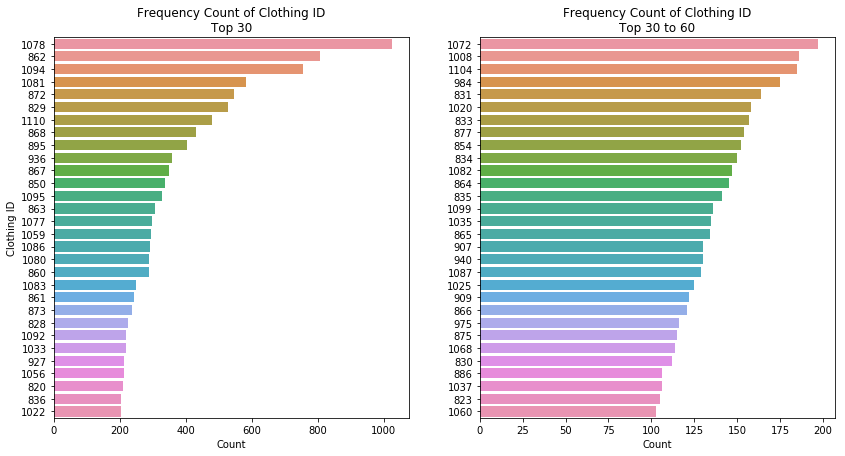

Dataframe Dimension: 23486 Rows


,mean,std,min,25%,50%,75%,max
Unnamed: 0,11524.217711,6677.024901,39.0,5702.25,11697.0,17350.75,23482.0
Clothing ID,1015.354988,103.422628,862.0,862.00,1078.0,1094.00,1094.0
Age,42.631090,12.110996,18.0,34.00,41.0,50.00,99.0
Rating,4.198763,1.099646,1.0,4.00,5.0,5.00,5.0
Recommended IND,0.820959,0.383461,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,2.767208,6.679159,0.0,0.00,1.0,3.00,98.0


In [30]:
f, axes = plt.subplots(1,2, figsize=[14,7])
num = 30
sns.countplot(y="Clothing ID", data = df[df["Clothing ID"].isin(df["Clothing ID"].value_counts()[:num].index)],
              order= df["Clothing ID"].value_counts()[:num].index, ax=axes[0])
axes[0].set_title("Frequency Count of Clothing ID\nTop 30")
axes[0].set_xlabel("Count")

sns.countplot(y="Clothing ID", data = df[df["Clothing ID"].isin(df["Clothing ID"].value_counts()[num:60].index)],
              order= df["Clothing ID"].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title("Frequency Count of Clothing ID\nTop 30 to 60")
axes[1].set_ylabel("")
axes[1].set_xlabel("Count")
plt.show()

print("Dataframe Dimension: {} Rows".format(df.shape[0]))
df[df["Clothing ID"].isin([1078, 862,1094])].describe().T.drop("count",axis=1)

ここから、多くのレビューを有している人気の商品を確認することができます。

In [31]:
df['Clothing ID'].value_counts()

1078    1024
862      806
1094     756
1081     582
872      545
829      527
1110     480
868      430
895      404
936      358
867      351
850      338
1095     327
863      306
1077     297
1059     294
1086     291
1080     289
860      288
1083     249
861      244
873      238
828      225
1092     220
1033     220
927      214
1056     213
820      211
836      205
1022     205
        ... 
88         1
72         1
56         1
1191       1
1175       1
1183       1
1127       1
887        1
600        1
648        1
680        1
712        1
137        1
105        1
89         1
73         1
57         1
41         1
25         1
9          1
1176       1
1160       1
1032       1
856        1
808        1
792        1
776        1
744        1
728        1
0          1
Name: Clothing ID, Length: 1206, dtype: int64

In [32]:
print(len(df[df['Clothing ID'] == 1078]))
df[df['Clothing ID'] == 1078]

1024


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
69,69,1078,56,Great summer fabric!,"I really wanted this to work. alas, it had a strange fit for me. the straps would not stay up, and it had a weird fit under the breast. it worked standing up, but the minute i sat down it fell off my shoulders. the fabric was beautiful! and i loved that it had pockets.",3,0,1,General Petite,Dresses,Dresses
90,90,1078,51,Sweet flattering dress,"I love cute summer dresses and this one, especially because it is made out of linen, is unique. it is very well-made with a design that is quite flattering. i am 5 foot 6 and a little curvy with a 38 c bust and i got a size 10. it fits well although it is difficult to zip up because the material has no give. the perfect dress to wear to italy or france! now i just have to book my tickets!",4,1,0,General Petite,Dresses,Dresses
117,117,1078,32,NaN,"This is the perfect summer dress. it can be dressed up or down. the quality of the linen fabric is very nice. i'm 5'1"" and it hit right below my knees. i found it to run true to size. those with a smaller bust might want to go down a size, but the tie in the front can be adjusted. it's lovely.",5,1,2,General Petite,Dresses,Dresses
467,467,1078,61,Great sweater dress!,"Nice fit and flare style, not clingy at all. i got the grey color, petite large, fits perfect. will wear with tights/boots or booties. lots of color options to accessorize with.",5,1,1,General,Dresses,Dresses
470,470,1078,33,"Cute, but cheap","When i first opened this dress and tried it on i thought it was adorable. it is very flattering on my hourglass figure and hides my recent baby weight. the problem is the hem. it was already rolling up when i took it out of the package, and i should have noticed and returned it, but i figured the problem would be easily solved by a good ironing. well, it wasn't, and it gets worse every time i wash the dress. it's like the hem isn't constructed properly.",3,0,0,General,Dresses,Dresses
474,474,1078,20,Super cute and flattering too,"I love this sweater dress and get compliments every time i wear it.. i bought the navy in size xs. the pattern and colors are just fun and youthful, although you don't have to be young to look good in this dress. the dress is fitted, but the skirt flares, making it flattering if you have hips like me. the material is not too heavy so you can wear this 3 seasons fall, winter, spring. as other reviews have mentioned the dress is short. i am 5'9"" so it does hit well above my knees. this isn't an is",5,1,1,General,Dresses,Dresses
476,476,1078,52,Fun dress,Extremely flattering. an easy dress to wear - good choice for both day and evening,5,1,1,General,Dresses,Dresses
486,486,1078,46,Fun mix of colors in the grey version,"I ordered this dress in size xl in the grey/red/yellow combination. i love everything about this dress. it's comfortable. the colors are cheerful. the proportions of where the stripes are placed works. but, i have to return this dress. it's too short for what i'm comfortable wearing. i saw from the photos that this comes mid-thigh on the taller models. i hoped that would mean it would be more knee-length for me. unfortunately, it's just too short and i'd feel self-conscious. i don't want to deal",5,1,1,General,Dresses,Dresses
492,492,1078,31,For the shorter girls,"I really wanted to love this dress, but it was so short! i'm only 5'6"" so i don't consider myself really tall, but the dress only came a couple of inches lower than my butt! way too short for me. my husband asked if it was a shirt or dress haha. but i think this would look adorable on someone a few inches shorter. or someone younger who can pull of a short shirt :)",4,1,4,General,Dresses,Dresses
497,497,1078,49,NaN,"Very cute, very comfortable. for me aesthetics and comfort must go hand in hand. this dress fits the bill.",5,1,2,General,Dresses,Dresses


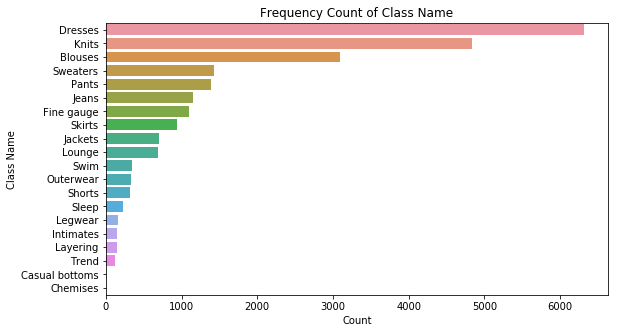

In [33]:
plt.subplots(figsize=(9,5))
sns.countplot(y="Class Name", data=df,order=df["Class Name"].value_counts().index)
plt.title("Frequency Count of Class Name")
plt.xlabel("Count")
plt.show()

#### その他

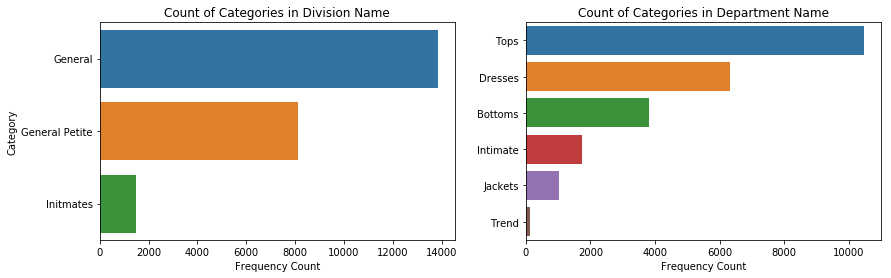

In [109]:
row_plots = ["Division Name","Department Name"]
f, axes = plt.subplots(1,len(row_plots), figsize=(14,4), sharex=False)

for i,x in enumerate(row_plots):
    sns.countplot(y=x, data=df,order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title("Count of Categories in {}".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")
axes[0].set_ylabel("Category")
axes[1].set_ylabel("")
plt.show()

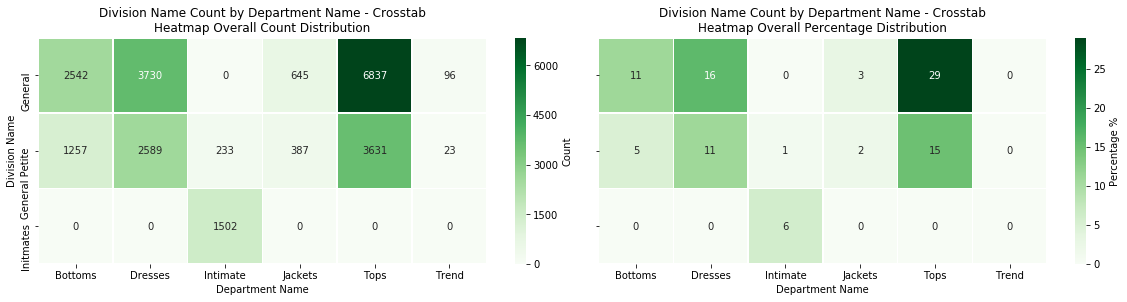

In [110]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

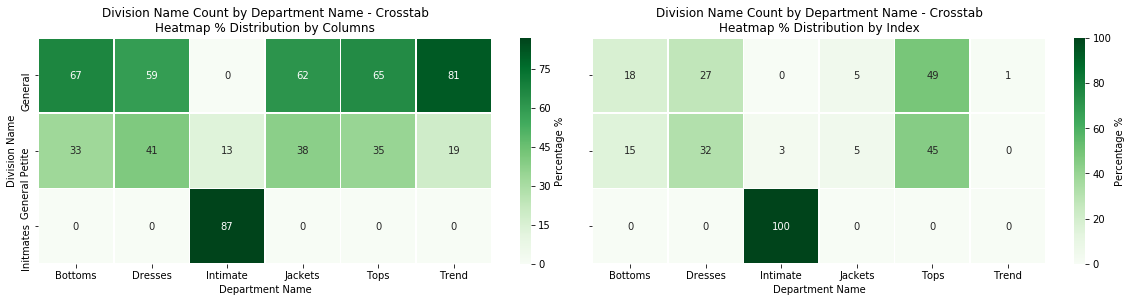

In [111]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

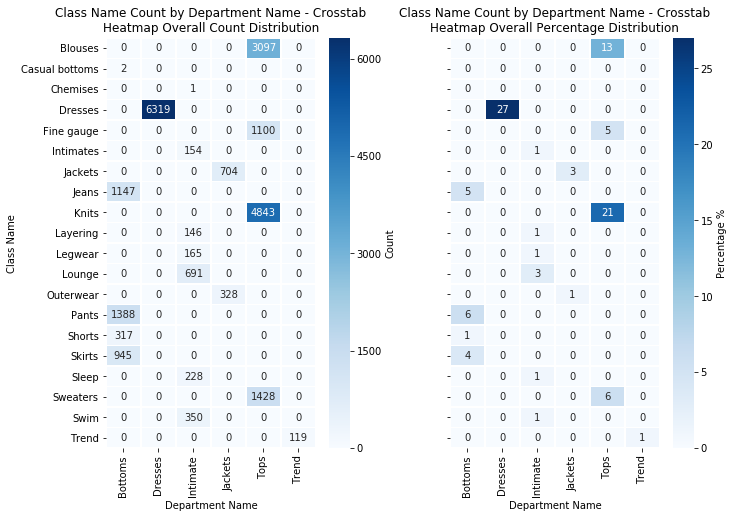

In [112]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Blues",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Blues",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

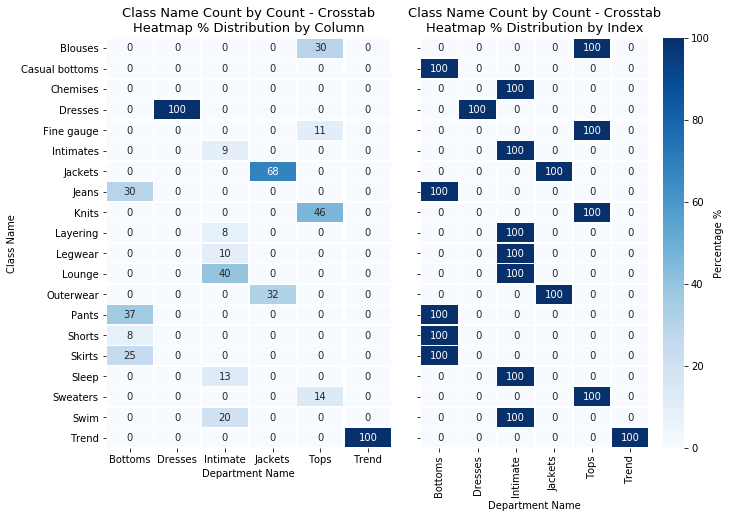

In [113]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize = 'columns').mul(100).round(0)
            ,annot=True, fmt="g", linewidths=.5, ax=ax[0],cbar=False,cmap="Blues")
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize = fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize = 'index').mul(100).round(0)
            ,annot=True, fmt="2g", linewidths=.5, ax=ax[1],cmap="Blues",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize = fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

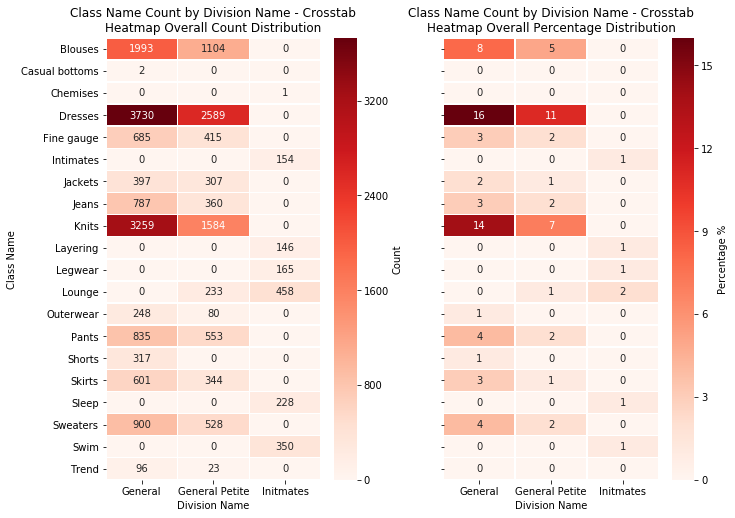

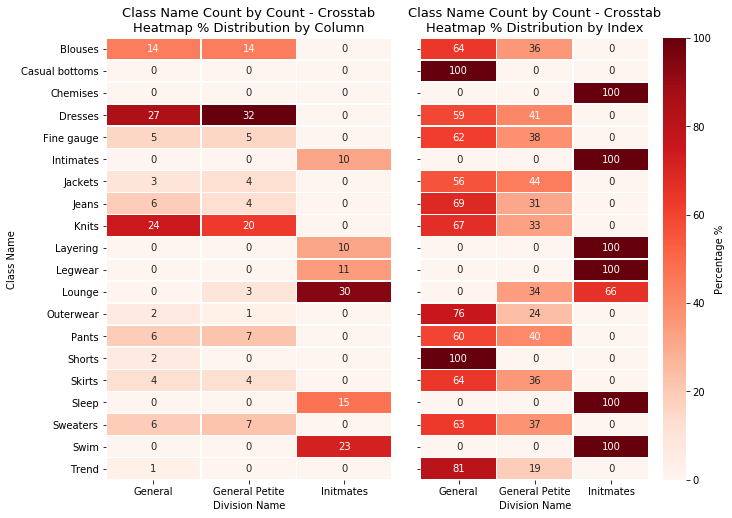

In [114]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize = 'columns').mul(100).round(0)
            ,annot=True, fmt="g", linewidths=.5, ax=ax[0],cbar=False,cmap="Reds")
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize = fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize = 'index').mul(100).round(0)
            ,annot=True, fmt="2g", linewidths=.5, ax=ax[1],cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize = fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)


# 学習

## データセットの準備

### データの整形

In [42]:
df_text = df[['Review Text', 'Rating']]
df_text.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comfortable,4
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5


### 欠損値の処理

In [52]:
df_text.isnull().sum().sort_values(ascending=False)

Review Text    845
Rating           0
dtype: int64

In [53]:
df_text['Review Text'] = df_text['Review Text'].fillna('no review')
df_text.isnull().sum().sort_values(ascending=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Rating         0
Review Text    0
dtype: int64

In [57]:
df_text.sample(30)

,Review Text,Rating
5902,"No need to be on the fence about this top, it's lovely! what you see pictured here, is exactly what you get, even the color of the top is 100% accurate. for reference i'm usually an xl/16, apple shape, 40 c bust, and this xl does not cling at all to me, so you may even be able to size down. the drape of the clipdot fabric is flattering, and thick enough not to need a cami. all of the fabrics used are nice and soft... and the details! it's going to be a beautiful spring!",5
6781,"I haven't worn jeans in a year because i felt uncomfortable and constrained. these are as soft as my leggings. they have so much stretch, you could do yoga in them. if you want the jean look w/o the stiffness/structure, get these. flattering to the booty too.",5
19334,"I have an hourglass shape, so this skirt is winner for me. classic a-line fit but with a modern hem. it's subtly shiny, very stylish, and comfortable. paired with a tight shirt and heels it looks extremely sexy. a sale price makes it all the sweeter.",5
6573,"I bought this dress in store today in a size 4, i usually wear an 8 (so i was thrilled) the print and details are gorgeous but it's a very wide swing dress, there is a lot of fabric and it has no waist. i'm going to wear this with a belt so it's fine but the images online are a little misleading.",4
5561,"I love this dress because it is amazingly feminine and easy to wear. i put this dress on and immediately felt elegant, sophisticated, and flirty all at the same time. a few tailoring uniquenesses i want to mention; stretchy, form fitting, sexy sheer upper and front back panel, you can wear a bra and not see it thru the sheer front and back portions of the dress, the waist is exactly tailored to show off back side. it is true to size.",5
13604,Light and distinctive design. the fabric seems somehow synthetic and in very warm weather might become not so fresh,4
4509,"I actually ended up buying two of these dresses. i took the first one to the dry cleaner and they chewed up the slip and put a hole in the dress. i was so sad that i went and bought a second one before they could sell out. the good news is that it was on sale! this is an awesome light and airy dress that is great for those hot summer days. i pretty much wear it every opportunity i get. for reference i purchased the small. it's loose but the shoulders, armholes and slip all fit perfectly. i weigh",5
13130,"I saw this online and went to the store yesterday to find it. i tried on a m, which is my normal size, and a s, which, if clothes are baggy, i'll buy for a more fitted look. the s was too small in the shoulders and my arm movement was restricted, so i bought the m. this is definitely true to size. it has a blousy waist to it, so no amount of downsizing will make this a fitted jacket. notice the model is pushing the jacket down with her hands in the pockets to make it look like it has a more defi",5
19780,"This dress is way prettier in person than online. fits like a glove. a little tight up top as are most side zips. i did not have to size up, however.",5
3328,I disagree with the fit description from the other reviews. i find the shirt to be super flattering and comfy. yes it it short in comparison to many styles these days. but it hits right at the waistline without being too short. super vibrant colors.,5


### TrainとTestデータに分ける

In [138]:
train = df_text[:18486]
test = df_text[18486:]
train.shape, test.shape

((18486, 2), (5000, 2))

## CountVectorizer

In [84]:
from sklearn.feature_extraction.text import CountVectorizer as CV
cv = CV(min_df=0.12, max_df=0.76, stop_words='english')
matrix = cv.fit_transform(list(x_train))
matrix

<18788x20 sparse matrix of type '<class 'numpy.int64'>'
	with 71122 stored elements in Compressed Sparse Row format>

**CountVectorizerの引数の説明**  
- **analyzer**: 文字の特徴をwordから作成するか、n-gramから作成するか。
- **token_pattern**: "token"を構成する正規表現。
- **ngram_range**: 抽出される異なるnグラムのn値の範囲の下限と上限。
- **min_df**: 単語の頻出率が指定したしきい値よりも低い単語は削除する。  
- **max_df**: 単語の頻出率が指定したしきい値よりも高い単語は削除する。  
- **stop_words**: "engligh"を指定すると、「a」や「the」などの意味を持たずに頻出する文字を削除する。

In [85]:
cv.get_feature_names()

['color',
 'comfortable',
 'cute',
 'dress',
 'fabric',
 'fit',
 'flattering',
 'great',
 'just',
 'like',
 'little',
 'look',
 'love',
 'ordered',
 'perfect',
 'really',
 'size',
 'small',
 'soft',
 'wear']

In [86]:
cv = CV(ngram_range=(1,2))
matrix = cv.fit_transform(list(x_train))
matrix

<18788x207711 sparse matrix of type '<class 'numpy.int64'>'
	with 1738373 stored elements in Compressed Sparse Row format>

In [87]:
cv.get_feature_names()

['00',
 '00 after',
 '00 am',
 '00 and',
 '00 based',
 '00 blouse',
 '00 but',
 '00 dollars',
 '00 dress',
 '00 fit',
 '00 fits',
 '00 for',
 '00 if',
 '00 in',
 '00 it',
 '00 just',
 '00 looked',
 '00 now',
 '00 oh',
 '00 or',
 '00 petite',
 '00 price',
 '00 regular',
 '00 sent',
 '00 since',
 '00 size',
 '00 so',
 '00 to',
 '00 want',
 '00 was',
 '00 were',
 '00 when',
 '00 which',
 '00 with',
 '00 would',
 '00 xxs',
 '000',
 '000 000',
 '000 glad',
 '00p',
 '00p 0p',
 '00p 110lbs',
 '00p and',
 '00p as',
 '00p better',
 '00p bust',
 '00p but',
 '00p currently',
 '00p fit',
 '00p hip',
 '00p in',
 '00p is',
 '00p it',
 '00p might',
 '00p not',
 '00p on',
 '00p or',
 '00p ordered',
 '00p size',
 '00p the',
 '00p this',
 '00p was',
 '00p xxs',
 '02',
 '02 first',
 '03',
 '03 dd',
 '03 fit',
 '03dd',
 '03dd 26',
 '04',
 '04 06',
 '06',
 '06 the',
 '0dd',
 '0dd 26',
 '0in',
 '0in but',
 '0p',
 '0p 26',
 '0p after',
 '0p am',
 '0p and',
 '0p bc',
 '0p bought',
 '0p but',
 '0p color',
 '0p

CountVevtorizerの引数で取ってくる単語に大きく差があることがわかりました。

In [75]:
import nltk

In [73]:
def noun_stem_analyzer(string):
    st = nltk.stem.lancaster.LancasterStemmer()
    return [st.stem(word) for word, pos in nltk.pos_tag(nltk.word_tokenize(string)) if pos == "NN"]

In [80]:
string = "Python is an interpreted high-level programming language for general-purpose programming."
noun_stem_analyzer(string)

['high-level', 'program', 'langu', 'program']

In [81]:
nltk.pos_tag(nltk.word_tokenize(string))

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('interpreted', 'JJ'),
 ('high-level', 'NN'),
 ('programming', 'NN'),
 ('language', 'NN'),
 ('for', 'IN'),
 ('general-purpose', 'JJ'),
 ('programming', 'NN'),
 ('.', '.')]

In [82]:
def noun_stem_analyzer(string):
    st = nltk.stem.lancaster.LancasterStemmer()
    return [st.stem(word) for word, pos in nltk.pos_tag(nltk.word_tokenize(string)) if pos == "NN" or pos == "NNP"]

In [83]:
noun_stem_analyzer(string)

['python', 'high-level', 'program', 'langu', 'program']

In [88]:
cv = CV(analyzer=noun_stem_analyzer)
matrix = cv.fit_transform(list(x_train))
cv.get_feature_names()

['%',
 "'4",
 "'beware",
 "'blue",
 "'body",
 "'boyfriend",
 "'cotton",
 "'cream",
 "'default",
 "'delicateness",
 "'drape",
 "'easy",
 "'flare",
 "'fluffy",
 "'glide",
 "'go",
 "'great",
 "'help",
 "'honey",
 "'ivory",
 "'lacy",
 "'nice",
 "'nightgown",
 "'older",
 "'parallel",
 "'peach",
 "'perfect",
 "'petite",
 "'pink",
 "'pop",
 "'red",
 "'sack",
 "'shell",
 "'slim",
 "'sweater",
 "'t",
 "'teeny-bop",
 "'trapeze",
 "'true",
 "'v",
 "'vintage",
 '**note',
 '*and*',
 '*another*',
 '*everything*',
 '*full*',
 '*highlight',
 '*imperfections*',
 '*just*',
 '*lot*',
 '*sheer*',
 '+',
 '+++++++++',
 ',110lbs,32c',
 ',120',
 ',125',
 ',125lbs',
 ',127lbs',
 ',130lb',
 ',145',
 ',170-180',
 ',34c',
 ',34dd',
 '-0',
 '-10',
 '-105',
 '-185',
 '-25',
 '-27-35',
 '-28',
 '-32-40',
 '-36c-125lbs',
 '-38',
 '-40',
 '-an',
 '-i',
 '-ish',
 '-it',
 '-like',
 '-line',
 '-not',
 '-off',
 '-perfect',
 '-rise',
 '-round',
 '-s',
 '-shoulder',
 '-small',
 '-the',
 '-this',
 '-tts',
 '-type',
 '-versat

In [89]:
cv = CV(analyzer=lambda x:x)
matrix = cv.fit_transform([noun_stem_analyzer(string) for string in list(x_train)])
cv.get_feature_names()

['%',
 "'4",
 "'beware",
 "'blue",
 "'body",
 "'boyfriend",
 "'cotton",
 "'cream",
 "'default",
 "'delicateness",
 "'drape",
 "'easy",
 "'flare",
 "'fluffy",
 "'glide",
 "'go",
 "'great",
 "'help",
 "'honey",
 "'ivory",
 "'lacy",
 "'nice",
 "'nightgown",
 "'older",
 "'parallel",
 "'peach",
 "'perfect",
 "'petite",
 "'pink",
 "'pop",
 "'red",
 "'sack",
 "'shell",
 "'slim",
 "'sweater",
 "'t",
 "'teeny-bop",
 "'trapeze",
 "'true",
 "'v",
 "'vintage",
 '**note',
 '*and*',
 '*another*',
 '*everything*',
 '*full*',
 '*highlight',
 '*imperfections*',
 '*just*',
 '*lot*',
 '*sheer*',
 '+',
 '+++++++++',
 ',110lbs,32c',
 ',120',
 ',125',
 ',125lbs',
 ',127lbs',
 ',130lb',
 ',145',
 ',170-180',
 ',34c',
 ',34dd',
 '-0',
 '-10',
 '-105',
 '-185',
 '-25',
 '-27-35',
 '-28',
 '-32-40',
 '-36c-125lbs',
 '-38',
 '-40',
 '-an',
 '-i',
 '-ish',
 '-it',
 '-like',
 '-line',
 '-not',
 '-off',
 '-perfect',
 '-rise',
 '-round',
 '-s',
 '-shoulder',
 '-small',
 '-the',
 '-this',
 '-tts',
 '-type',
 '-versat

analyzerは自分で作成した関数を入れることもできます。

## スコアリング

### TfidfVectorizer

TfidfVectorizerで学習をさせてみます。

In [101]:
cv = CV(anamin_df=0.12, max_df=0.76, stop_words='english')
matrix = cv.fit_transform(df_text['Review Text'].values.astype('U'))
matrix.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 3, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1]], dtype=int64)

In [102]:
cv.get_feature_names()

['color',
 'comfortable',
 'dress',
 'fabric',
 'fit',
 'flattering',
 'great',
 'just',
 'like',
 'little',
 'look',
 'love',
 'ordered',
 'perfect',
 'really',
 'size',
 'small',
 'soft',
 'wear']

In [103]:
cv.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [107]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [108]:
X_train = df_text.loc[:18788, 'Review Text'].values
y_train = df_text.loc[:18788, 'Rating'].values
X_test = df_text.loc[18788:, 'Review Text'].values
y_test = df_text.loc[18788:, 'Rating'].values

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.grid_search import GridSearchCV
# from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [cv.get_stop_words(), None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [cv.get_stop_words(), None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

gs_lr_tfidf.fit(X_train, y_train)

print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)

clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 12.5min finished


Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l1', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x1a24a6f378>} 
CV Accuracy: 0.635
Test Accuracy: 0.620


**0.620**というスコアがでました。

### ナイーブベイズ

次はナイーブベイズで学習を行ってみたいと思います。

In [140]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [145]:
cv = CV(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 3), stop_words = 'english', max_features=5000)
cv.fit(list(train['Review Text'].values.astype('U'))+list(test['Review Text'].values.astype('U')))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)

In [146]:
cv.get_feature_names()

['0',
 '0 2',
 '0 fit',
 '0 fits',
 '0 petite',
 '00',
 '00p',
 '0p',
 '1',
 '1 2',
 '1 5',
 '1 size',
 '10',
 '10 12',
 '10 fit',
 '10 m',
 '100',
 '100 cotton',
 '105',
 '105 lbs',
 '108',
 '11',
 '110',
 '110 lbs',
 '110lbs',
 '112',
 '115',
 '115 lbs',
 '115 lbs 30',
 '115 lbs 30dd',
 '115lbs',
 '117',
 '118',
 '118 lbs',
 '12',
 '12 14',
 '12 fit',
 '120',
 '120 lbs',
 '120lbs',
 '122',
 '125',
 '125 lbs',
 '125lbs',
 '128',
 '128 lbs',
 '130',
 '130 lbs',
 '130lbs',
 '135',
 '135 lbs',
 '135 pounds',
 '135lbs',
 '135lbs 34c',
 '138',
 '14',
 '14 16',
 '140',
 '140 lbs',
 '140lbs',
 '145',
 '145 lbs',
 '145lbs',
 '15',
 '150',
 '150 lbs',
 '155',
 '16',
 '160',
 '2',
 '2 115',
 '2 4',
 '2 colors',
 '2 fit',
 '2 fits',
 '2 inches',
 '2 ordered',
 '2 petite',
 '2 retailer',
 '2 sizes',
 '20',
 '24',
 '25',
 '25 26',
 '26',
 '26 27',
 '26 5',
 '26 5 waist',
 '26 waist',
 '26 waist 36',
 '27',
 '27 35',
 '28',
 '28 29',
 '29',
 '2nd',
 '2p',
 '3',
 '3 120',
 '3 4',
 '3 4 length',
 '3 

In [147]:
X_train=cv.transform(train['Review Text'].values.astype('U'))
X_test=cv.transform(test['Review Text'].values.astype('U'))
y_train = train['Rating']
y_test = test['Rating']

In [149]:
model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Acuracy score: {}".format(accuracy_score(y_test, predictions)))

Acuracy score: 0.6004


ナイーブベイズを使うとスコアが**0.6004**になりました。

ナイーブベイズと同じ条件でTfidfVectorizerを使って学習をさせてみます。

In [151]:
X_train = train['Review Text'].values
y_train = train['Rating'].values
X_test = test['Review Text'].values
y_test = test['Rating'].values

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.grid_search import GridSearchCV
# from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [cv.get_stop_words(), None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [cv.get_stop_words(), None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

gs_lr_tfidf.fit(X_train, y_train)

print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)

clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 12.6min finished


Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l1', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x1a24a6f378>} 
CV Accuracy: 0.635
Test Accuracy: 0.617


スコアは**0.617**と、1回目よりも落ちてしましました。